In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def moving_average(a, n=100):
    moving_average = []
    for i in range(len(a)):
        start = max(0, i - n)
        values = a[start:i+1]
        moving_average.append(np.sum(values) / float(len(values)))
    return np.array(moving_average)

In [3]:
def read_log(fname):
    file = open(fname, 'r')
    next(file)
    td_x, tdnn, tdsnn = [], [], []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,target,tdnn_prediction,tdsnn_prediction,noise_level,training_loss,tdnn_loss,tdsnn_loss,conversion_loss = line
        td_x.append(int(it))
        tdnn.append(float(target == tdnn_prediction))
        tdsnn.append(float(target == tdsnn_prediction))
    return td_x, moving_average(tdnn), moving_average(tdsnn), noise_level

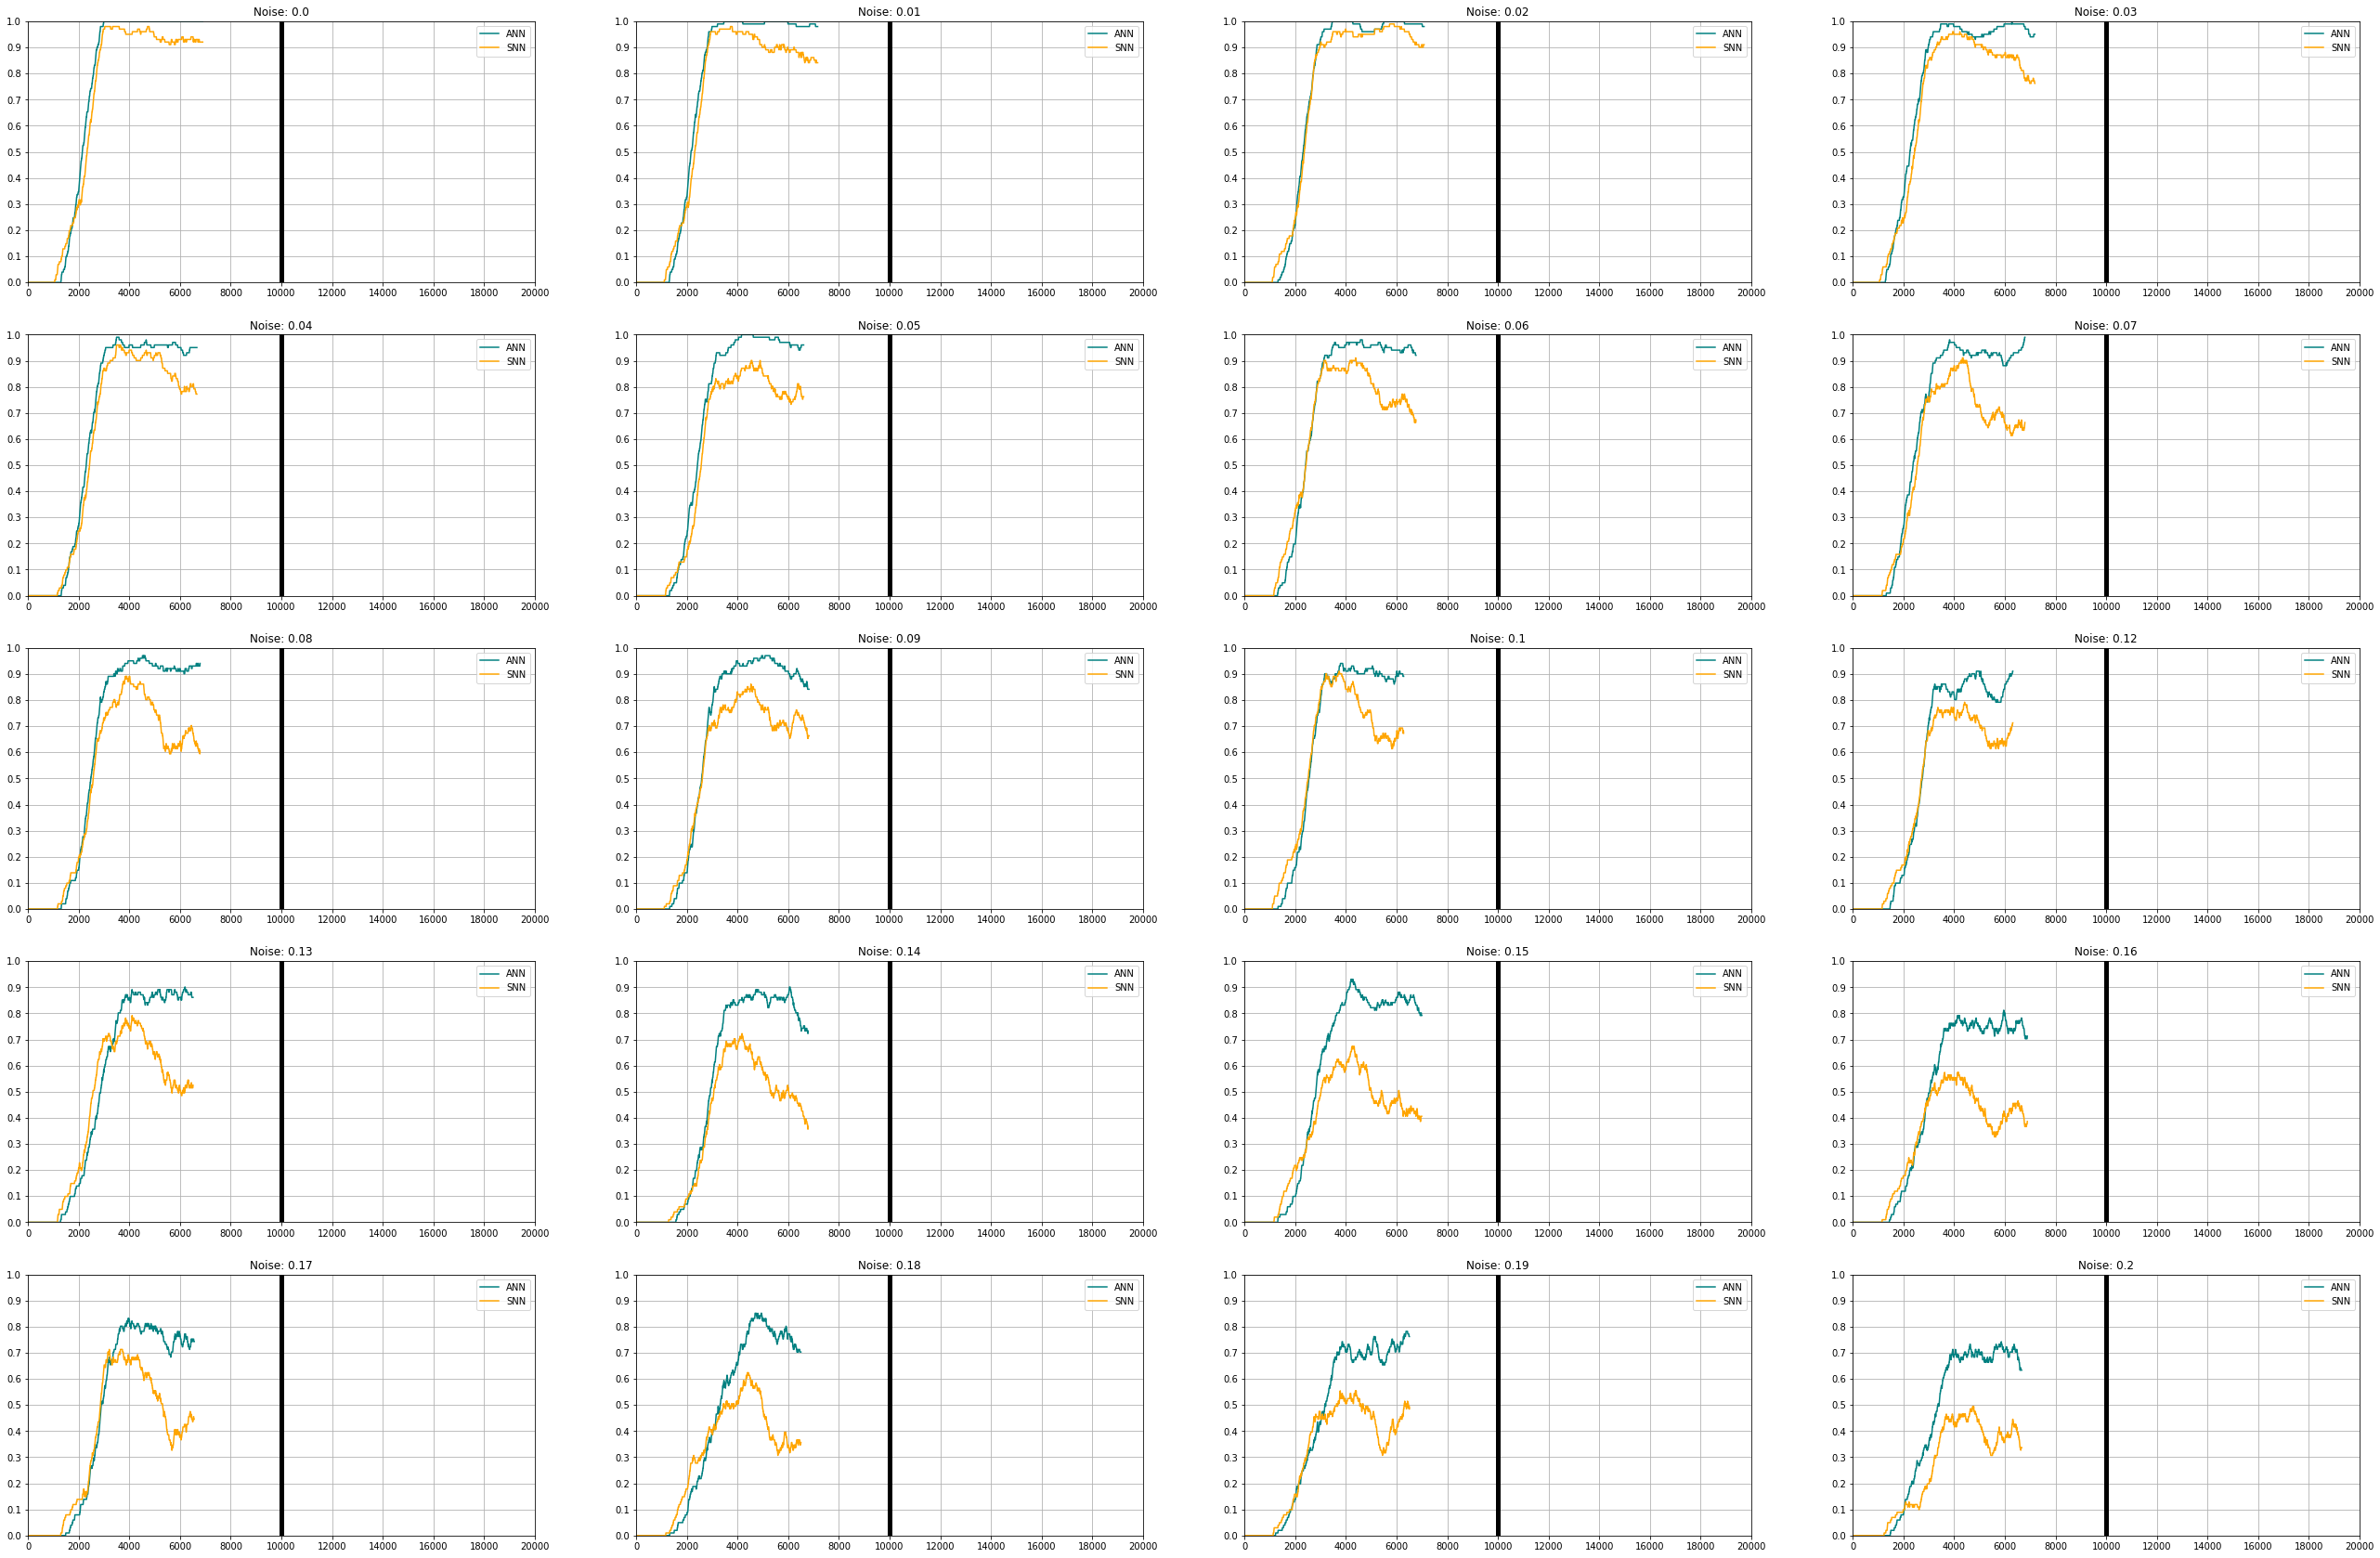

In [4]:
i = 4847880
plt.figure(figsize=(45, 30))
while i < 4847900:
    plt.subplot(5, 4, i - 4847879)
    td_x1, tdnn1, tdsnn1, noise = read_log(f'slurm-{i}.out')
    #td_x2, tdnn2, tdsnn2, noise = read_log(f'slurm-{i+21}.out')
    plt.title(f'Noise: {noise}')
    
    plt.plot(td_x1, tdnn1, color='teal', label='ANN')
    plt.plot(td_x1, tdsnn1, color='orange', label='SNN')
    
    #plt.plot(td_x2, tdnn2)
    #plt.plot(td_x2, tdsnn2)
    
    plt.xlim(0, 20000)
    plt.ylim(0, 1)
    plt.plot([10000, 10000], [0, 1], linewidth=5, color='black')
    plt.yticks(np.linspace(0, 1, 11))
    plt.legend()
    plt.xticks(np.linspace(0, 20000, 11))
    plt.grid()
    i += 1
plt.savefig('noise-results-random-sigmoid.pdf', dpi=200)
plt.show()

In [5]:
def read_log_noise(fname):
    file = open(fname, 'r')
    next(file)
    td_x, conversion_losses, tdnn_losses, tdsnn_losses = [], [], [], []
    for line in file.readlines():
        line = line.strip('\n').split(',')
        it,target,tdnn_prediction,tdsnn_prediction,noise_level,training_loss,tdnn_loss,tdsnn_loss,conversion_loss = line
        td_x.append(int(it))
        conversion_losses.append(float(conversion_loss))
        tdnn_losses.append(float(tdnn_loss))
        tdsnn_losses.append(float(tdsnn_loss))
    return td_x, conversion_losses, tdnn_losses, tdsnn_losses, noise_level

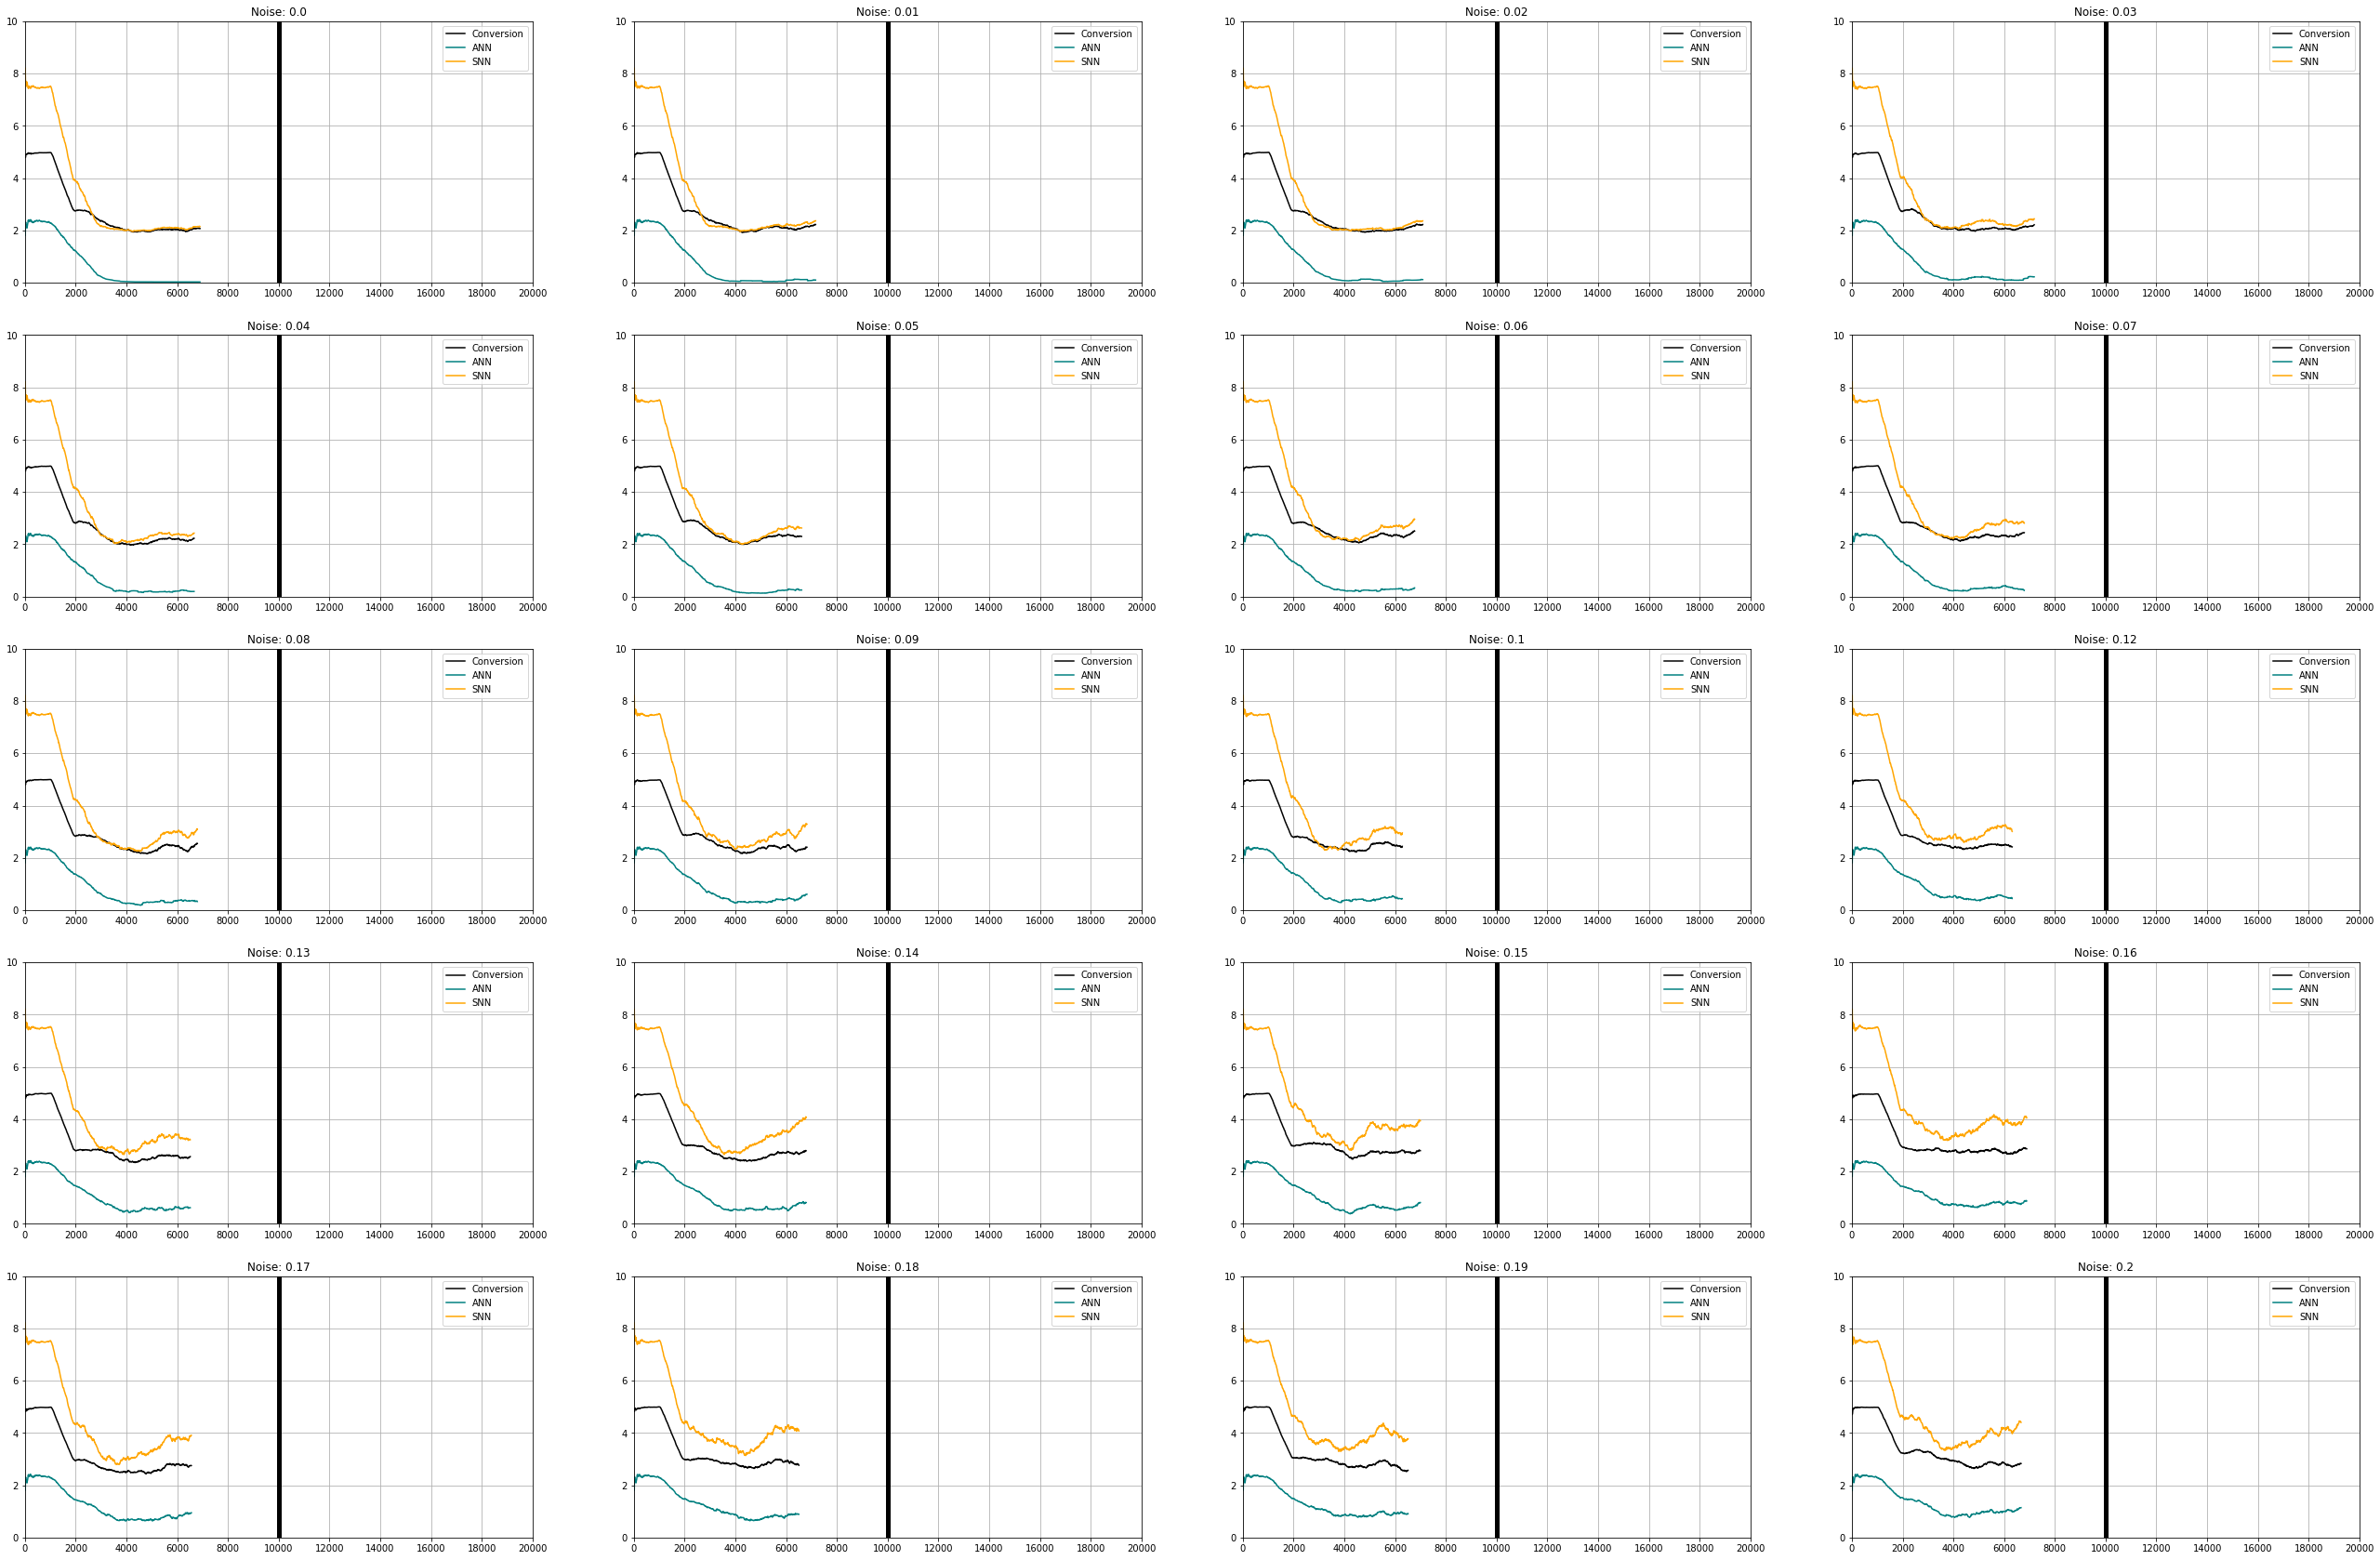

In [6]:
i = 4847880
plt.figure(figsize=(45, 30))
while i < 4847900:
    plt.subplot(5, 4, i - 4847879)
    td_x1, conversion_loss, tdnn_loss, tdsnn_loss, noise = read_log_noise(f'slurm-{i}.out')
    plt.title(f'Noise: {noise}')
    
    plt.plot(td_x1, moving_average(conversion_loss), label='Conversion', color='black')
    plt.plot(td_x1, moving_average(tdnn_loss), label='ANN', color='teal')
    plt.plot(td_x1, moving_average(tdsnn_loss), label='SNN', color='orange')
    
    plt.xlim(0, 20000)
    plt.ylim(0, 10)
    plt.plot([10000, 10000], [0, 20], linewidth=5, color='black')
    #plt.yticks(np.linspace(0, 1, 11))
    plt.xticks(np.linspace(0, 20000, 11))
    plt.grid()
    plt.legend()
    i += 1
plt.savefig('noise-results-random-sigmoid-loss.pdf', dpi=200)
plt.show()